In [1]:
#importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt

In [2]:
#loading data
data = pd.read_csv("SupplyChainAnalysis.csv")

In [3]:
data.head()

,Product type,SKU,Price,Availability,Number of products sold,Revenue generated,Customer demographics,Stock levels,Lead times,Order quantities,...,Location,Lead time,Production volumes,Manufacturing lead time,Manufacturing costs,Inspection results,Defect rates,Transportation modes,Routes,Costs
0,haircare,SKU0,69.808006,55,802,8661.996792,Non-binary,58,7,96,...,Mumbai,29,215,29,46.279879,Pending,0.226410,Road,Route B,187.752075
1,skincare,SKU1,14.843523,95,736,7460.900065,Female,53,30,37,...,Mumbai,23,517,30,33.616769,Pending,4.854068,Road,Route B,503.065579
2,haircare,SKU2,11.319683,34,8,9577.749626,Unknown,1,10,88,...,Mumbai,12,971,27,30.688019,Pending,4.580593,Air,Route C,141.920282
3,skincare,SKU3,61.163343,68,83,7766.836426,Non-binary,23,13,59,...,Kolkata,24,937,18,35.624741,Fail,4.746649,Rail,Route A,254.776159
4,skincare,SKU4,4.805496,26,871,2686.505152,Non-binary,5,3,56,...,Delhi,5,414,3,92.065161,Fail,3.145580,Air,Route A,923.440632


In [4]:
data.info()  #no null-entries in the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Product type             100 non-null    object 
 1   SKU                      100 non-null    object 
 2   Price                    100 non-null    float64
 3   Availability             100 non-null    int64  
 4   Number of products sold  100 non-null    int64  
 5   Revenue generated        100 non-null    float64
 6   Customer demographics    100 non-null    object 
 7   Stock levels             100 non-null    int64  
 8   Lead times               100 non-null    int64  
 9   Order quantities         100 non-null    int64  
 10  Shipping times           100 non-null    int64  
 11  Shipping carriers        100 non-null    object 
 12  Shipping costs           100 non-null    float64
 13  Supplier name            100 non-null    object 
 14  Location                 10

In [5]:
data.describe(include='all')

,Product type,SKU,Price,Availability,Number of products sold,Revenue generated,Customer demographics,Stock levels,Lead times,Order quantities,...,Location,Lead time,Production volumes,Manufacturing lead time,Manufacturing costs,Inspection results,Defect rates,Transportation modes,Routes,Costs
count,100,100,100.000000,100.000000,100.000000,100.000000,100,100.000000,100.000000,100.000000,...,100,100.000000,100.000000,100.00000,100.000000,100,100.000000,100,100,100.000000
unique,3,100,NaN,NaN,NaN,NaN,4,NaN,NaN,NaN,...,5,NaN,NaN,NaN,NaN,3,NaN,4,3,NaN
top,skincare,SKU0,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,...,Kolkata,NaN,NaN,NaN,NaN,Pending,NaN,Road,Route A,NaN
freq,40,1,NaN,NaN,NaN,NaN,31,NaN,NaN,NaN,...,25,NaN,NaN,NaN,NaN,41,NaN,29,43,NaN
mean,NaN,NaN,49.462461,48.400000,460.990000,5776.048187,NaN,47.770000,15.960000,49.220000,...,NaN,17.080000,567.840000,14.77000,47.266693,NaN,2.277158,NaN,NaN,529.245782
std,NaN,NaN,31.168193,30.743317,303.780074,2732.841744,NaN,31.369372,8.785801,26.784429,...,NaN,8.846251,263.046861,8.91243,28.982841,NaN,1.461366,NaN,NaN,258.301696
min,NaN,NaN,1.699976,1.000000,8.000000,1061.618523,NaN,0.000000,1.000000,1.000000,...,NaN,1.000000,104.000000,1.00000,1.085069,NaN,0.018608,NaN,NaN,103.916248
25%,NaN,NaN,19.597823,22.750000,184.250000,2812.847151,NaN,16.750000,8.000000,26.000000,...,NaN,10.000000,352.000000,7.00000,22.983299,NaN,1.009650,NaN,NaN,318.778455
50%,NaN,NaN,51.239831,43.500000,392.500000,6006.352023,NaN,47.500000,17.000000,52.000000,...,NaN,18.000000,568.500000,14.00000,45.905622,NaN,2.141863,NaN,NaN,520.430444
75%,NaN,NaN,77.198228,75.000000,704.250000,8253.976921,NaN,73.000000,24.000000,71.250000,...,NaN,25.000000,797.000000,23.00000,68.621026,NaN,3.563995,NaN,NaN,763.078231


In [7]:
#dropping duplicate rows
data.drop_duplicates(keep='first')
data.info()            #there are no duplcate entries in the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Product type             100 non-null    object 
 1   SKU                      100 non-null    object 
 2   Price                    100 non-null    float64
 3   Availability             100 non-null    int64  
 4   Number of products sold  100 non-null    int64  
 5   Revenue generated        100 non-null    float64
 6   Customer demographics    100 non-null    object 
 7   Stock levels             100 non-null    int64  
 8   Lead times               100 non-null    int64  
 9   Order quantities         100 non-null    int64  
 10  Shipping times           100 non-null    int64  
 11  Shipping carriers        100 non-null    object 
 12  Shipping costs           100 non-null    float64
 13  Supplier name            100 non-null    object 
 14  Location                 10

In [22]:
product_type=data.groupby('Product type')['Number of products sold'].sum().reset_index()

([<matplotlib.patches.Wedge at 0x26d9c1d3b50>,
 [Text(0.7654095624678168, 0.7900305068051647, 'cosmetics'),
  Text(-0.9006239776936397, 0.6315666637840274, 'haircare'),
  Text(0.17308125920105938, -1.0862977850080409, 'skincare')],
 [Text(0.4174961249824455, 0.43092573098463527, '25.50%'),
  Text(-0.49124944237834883, 0.3444909075185603, '29.53%'),
  Text(0.09440795956421419, -0.5925260645498405, '44.97%')])

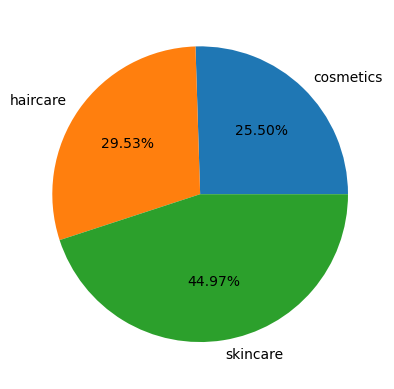

In [26]:
plt.pie(product_type['Number of products sold'],labels=product_type['Product type'],autopct='%1.2f%%')

In [37]:
demographics=data['Customer demographics'].value_counts()
demographics=pd.DataFrame(demographics)
demographics

,count
Customer demographics,
Unknown,31
Female,25
Non-binary,23
Male,21


<Axes: xlabel='Customer demographics', ylabel='count'>

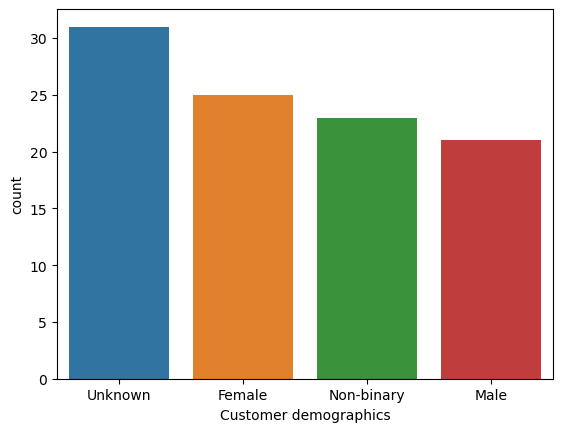

In [42]:
sns.barplot(x=demographics.index,y=demographics['count'])

In [44]:
carriers=data['Shipping carriers'].value_counts()
carriers=pd.DataFrame(carriers)

([<matplotlib.patches.Wedge at 0x26d9f6b0a10>,
 [Text(0.23995754141400957, 1.0735084435245696, 'Carrier B'),
  Text(-0.9801071672559598, -0.49938956806635265, 'Carrier C'),
  Text(0.7011663855493696, -0.8475645696792858, 'Carrier A')])

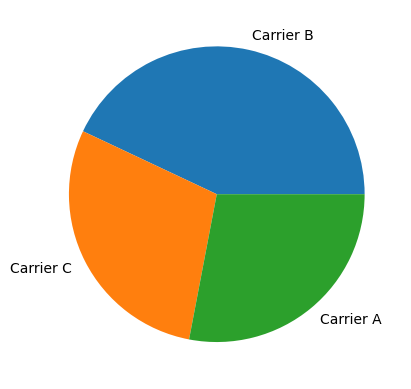

In [46]:
plt.pie(carriers['count'],labels=carriers.index)

In [48]:
revenue_loc=data.groupby('Location').agg({'Revenue generated':'sum'})
revenue_loc

,Revenue generated
Location,
Bangalore,102601.723882
Chennai,119142.815748
Delhi,81027.701225
Kolkata,137077.551005
Mumbai,137755.026877


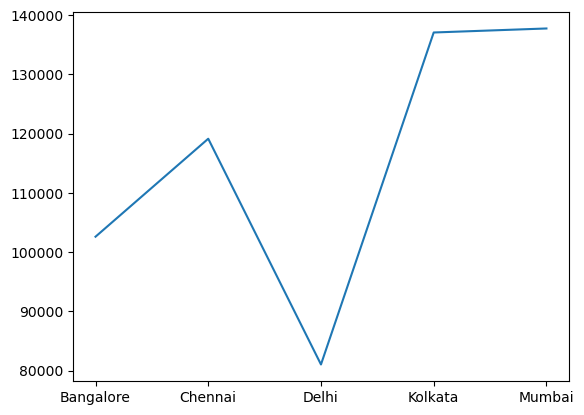

In [52]:
plt.plot(revenue_loc.index,revenue_loc['Revenue generated'])

<Axes: xlabel='Production volumes', ylabel='Defect rates'>

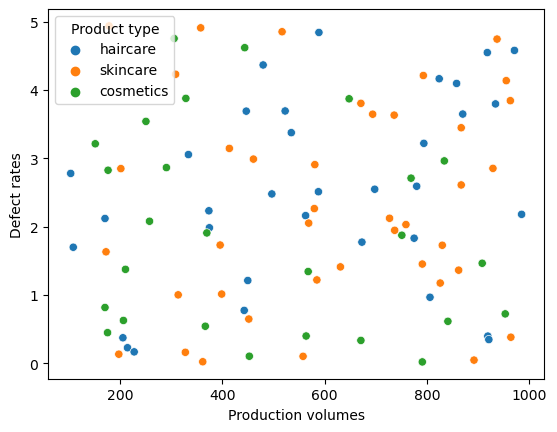

In [68]:
sns.scatterplot(x=data['Production volumes'],y=data['Defect rates'],hue=data['Product type'])